Loading dataset

In [1]:
from sklearn import datasets
digits=datasets.load_digits()

Full description of the dataset

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

The numerical value represented by images ie. targets are cotained in digits.target

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
digits.target.size  #there are 1797 values represented by images

1797

In [5]:
digits.data.shape  #Shape of the dataset

(1797, 64)

The images of handwritten digits are contained in digits.images array.Each element of this array is an image that is represented by an 8x8 matrix of numerical values that correspond to a grayscale from white,with the value of 0,to black with the value of 15

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualizing an array

Text(0.5, 1.0, 'Visualization of an array')

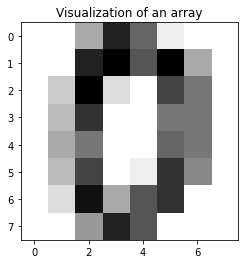

In [7]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap=plt.cm.gray_r,interpolation='nearest')
plt.title("Visualization of an array")

Visualization of digits

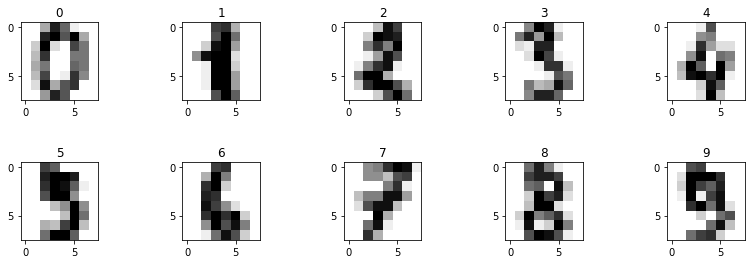

In [8]:
import numpy as np
plt.figure(figsize=(14,4))
plt.subplots_adjust(hspace=0.8)
images_and_labels=list(zip(digits.images,digits.target))

for index,(image,label) in enumerate(images_and_labels[:10]):
  plt.subplot(2,5,index+1)  #Because of index+1, 0 to 9 images are visible, otherwise only 9 is visible
  plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  plt.title(index)


Flatten the images

In [9]:
n_samples=len(digits.images)
n_samples

1797

In [10]:
data=digits.images.reshape((n_samples,-1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

**Hypothesis to be tested:** Digit dataset of Scikit-Learn's library predicts the digits accurately 95% of the time.

**Test Cases:**

**Case-1:** Here we have split the data by assigning 0.01 as test size

In [11]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,digits.target,test_size=0.01,random_state=0)

Training the model

In [12]:
from sklearn.svm import SVC
svc=SVC(gamma=0.001,C=100.)



In [13]:
svc.fit(x_train,y_train)

SVC(C=100.0, gamma=0.001)

Predicting the output

In [14]:
y_pred=svc.predict(x_test)

In [15]:
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

Test  samples and their predicted digits

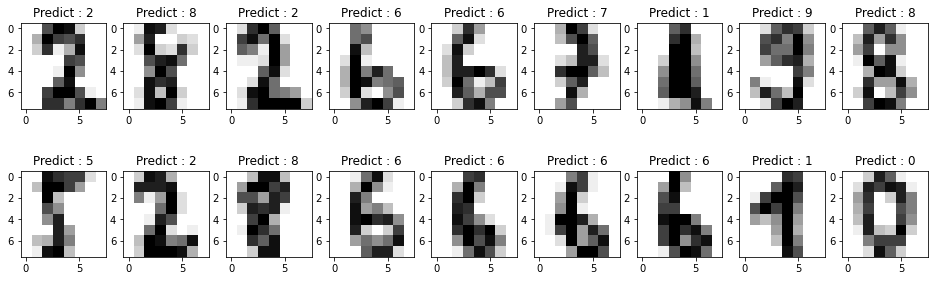

In [16]:
images_and_predictions=list(zip(x_test,y_pred))
plt.figure(figsize=(18,5))
plt.subplots_adjust(0.2)

for index,(image,prediction) in enumerate(images_and_predictions[:19]):
  image=image.reshape(8,8)
  plt.subplot(2,9,index+1)
  plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  plt.title("Predict : {0}".format(prediction))


Evaluation

In [17]:
score=svc.score(x_test,y_test)
print("Accuracy Score: {0}".format(score))   #Model is 100% accurate

Accuracy Score: 1.0


In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [19]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print("\n",cr)


               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



**Case-2:** Here we have split the data by assigning 0.5 as test size

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.5,random_state=0)

In [21]:
from sklearn.svm import SVC
svc=SVC(gamma=0.001,C=100.)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       7, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [22]:
score=svc.score(x_test,y_pred)
print("Accuracy Score: {0}".format(score))

Accuracy Score: 1.0


**Case-3:** Here we have split the data by assigning 0.9 as a test size

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.9, random_state=0)
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [44]:
y_pred

array([2, 8, 2, ..., 4, 6, 8])

In [46]:
score=svc.score(x_test,y_pred)
print("Accuracy score: {0}".format(score))

Accuracy score: 1.0


**Conclusion:** Digit dataset of Scikit-Learn's library predicts the digits accurately 95% of the time.